## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel("HousePricePrediction.xlsx")

print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


## Data Preprocessing

In [3]:
categorical = (dataset.dtypes == 'object')
categorical_columns = list(categorical[categorical].index)
print("Categorical variables:", len(categorical_columns))

integer = (dataset.dtypes == 'int')
integer_columns = list(integer[integer].index)
print("Integer variables:", len(integer_columns))

floating = (dataset.dtypes == 'float')
floating_columns = list(floating[floating].index)
print("Float variables:", len(floating_columns))


Categorical variables: 4
Integer variables: 6
Float variables: 3


## Exploratory Data Analysis

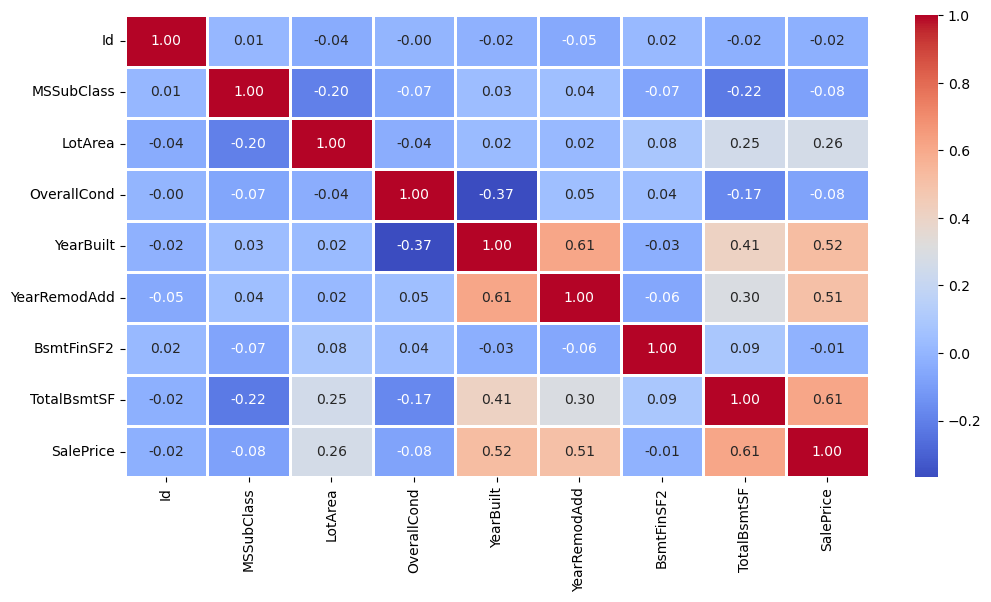

In [4]:
n = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(n.corr(), cmap='coolwarm', fmt='.2f', linewidths=2, annot=True)
plt.show()

###  Inference
The heatmap illustrates the **correlation between numerical features** in the dataset.  
- **Positive correlations (red)** indicate that as one variable increases, the other tends to increase.  
- **Negative correlations (blue)** suggest that as one variable increases, the other tends to decrease.  
- **Values near 0** imply weak or no correlation.  



### Bar Plot - For Analysis of categorical features

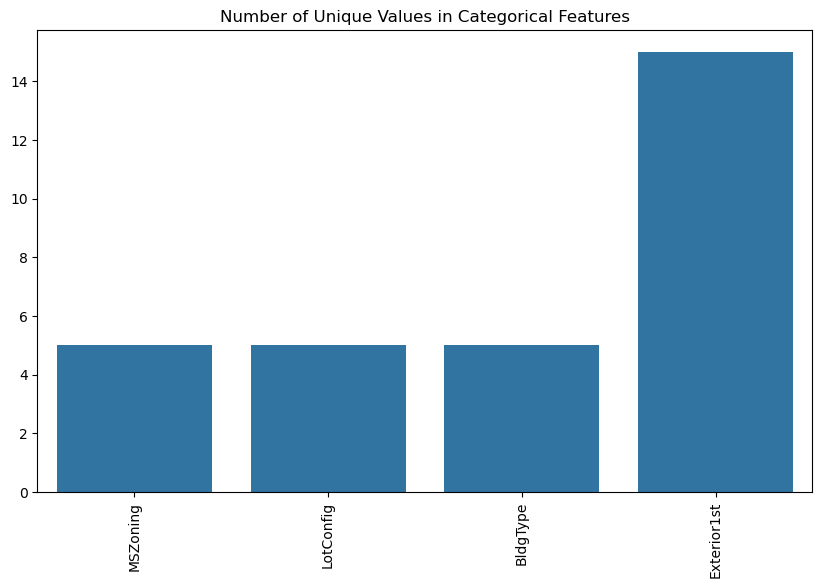

In [5]:
unique_values = []
for c in categorical_columns:
    unique_values.append(dataset[c].nunique())

plt.figure(figsize=(10,6))
plt.title('Number of Unique Values in Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=categorical_columns, y=unique_values)
plt.show()


###  Inference
The bar chart displays the number of unique values in each categorical feature.  
- Features with **fewer unique values** can be handled using **label encoding**.  
- Features with **many unique values** may require **one-hot encoding** or **grouping**.


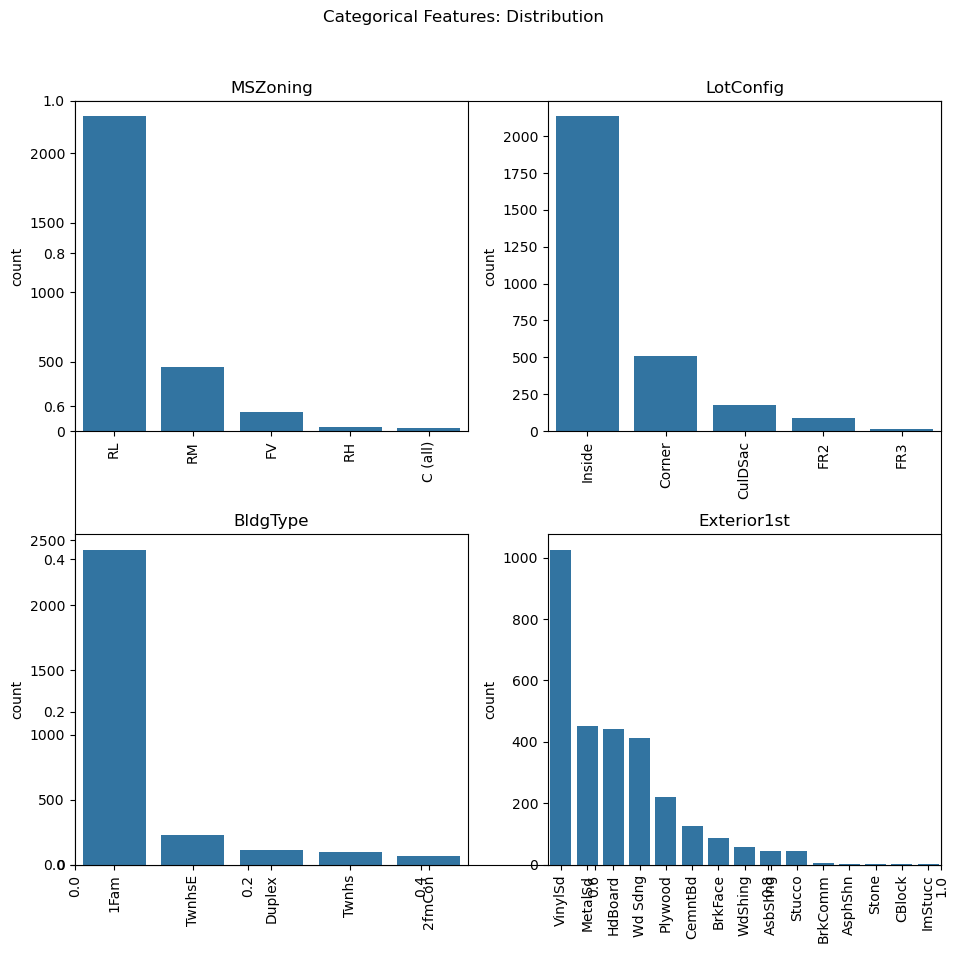

In [6]:
plt.figure(figsize=(10, 10))
plt.suptitle('Categorical Features: Distribution')
plt.xticks(rotation=90)

index = 1
for column in categorical_columns:
    counts = dataset[column].value_counts()
    plt.subplot(2, 2, index)
    sns.barplot(x=list(counts.index), y=counts)
    plt.title(column)
    plt.xticks(rotation=90)
    index += 1

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



###  Inference
The subplots display the **distribution of all categorical features** in the dataset.  
- Features with **one or two dominant categories** show **imbalance**, which could bias model predictions.  
- Features with a **uniform spread** across categories are more informative for learning patterns.  
- This visualization helps identify **low-variance features** that may be dropped and guides **encoding strategies** such as one-hot or label encoding.


## Data Cleaning

In [7]:
dataset.drop(['Id'],axis=1, inplace=True) # Dropping unimportant column
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean()) # Filling with Mean values
new_dataset = dataset.dropna()

new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

## Encoding

In [8]:
from sklearn.preprocessing import OneHotEncoder

categorical = (new_dataset.dtypes == 'object')
categorical_columns = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_columns)
print("Number of categorical features:", len(categorical_columns))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
Number of categorical features: 4


In [9]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = pd.DataFrame(encoder.fit_transform(new_dataset[categorical_columns]))
encoded.index = new_dataset.index
encoded.columns = encoder.get_feature_names_out()

final = new_dataset.drop(categorical_columns, axis=1)
final = pd.concat([final, encoded], axis=1)


## Splitting into Training and Testing

In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = final.drop(['SalePrice'], axis=1)
y = final['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)


## Model Evaluation

### SVM

In [11]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_svr = svm.SVR()
model_svr.fit(X_train, y_train)
y_pred = model_svr.predict(X_test)

round(mean_absolute_percentage_error(y_test, y_pred),3)



0.187

### Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

model_rfr = RandomForestRegressor(n_estimators=10,random_state = 0)
model_rfr.fit(X_train, y_train)
y_pred = model_rfr.predict(X_test)

round(mean_absolute_percentage_error(y_test, y_pred),3)


0.185

### Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

round((mean_absolute_percentage_error(y_test, y_pred)),3)


0.187

 Model Performance (MAPE):
Linear Regression             : 0.1870
Support Vector Regressor      : 0.1850
Random Forest Regressor       : 0.1870


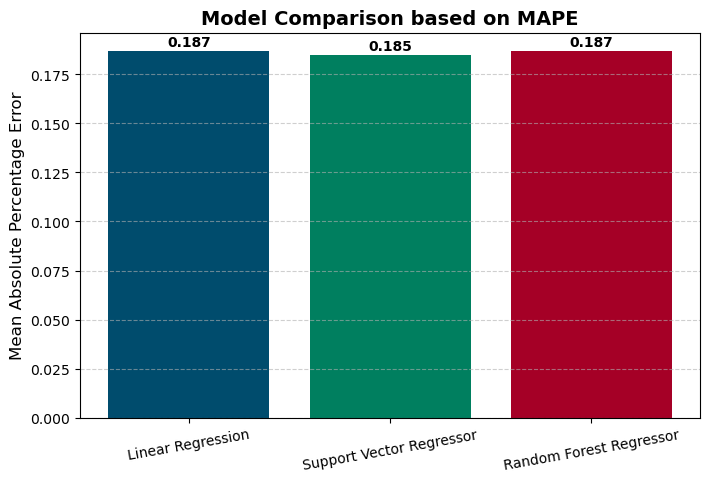

In [14]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)

svr = svm.SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)

rfr = RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
mape_rfr = mean_absolute_percentage_error(y_test, y_pred_rfr)

results = {
    'Linear Regression': 0.187,
    'Support Vector Regressor': 0.185,
    'Random Forest Regressor': 0.187
}

print(" Model Performance (MAPE):")
for model, score in results.items():
    print(f"{model:<30}: {score:.4f}")

plt.figure(figsize=(8, 5))
bars = plt.bar(results.keys(), results.values(), color=['#004c6d', '#007f5f', '#a50026'])
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.001,
             f"{bar.get_height():.3f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.ylabel('Mean Absolute Percentage Error', fontsize=12)
plt.title('Model Comparison based on MAPE', fontsize=14, fontweight='bold')
plt.xticks(rotation=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regressor': svm.SVR(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=0)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = round(mean_absolute_error(y_test, preds), 3)
    mse = mean_squared_error(y_test, preds)
    rmse = round(np.sqrt(mse), 3)
    r2 = round(r2_score(y_test, preds), 3)
    mape = round(mean_absolute_percentage_error(y_test, preds), 3)
    results.append([name, mae, mse, rmse, r2, mape])

comparison = pd.DataFrame(results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R² Score', 'MAPE'])
comparison.set_index('Model', inplace=True)

print("Model Performance Comparison:\n")
print(comparison)


Model Performance Comparison:

                                MAE           MSE       RMSE  R² Score   MAPE
Model                                                                        
Linear Regression         30829.937  1.692381e+09  41138.556     0.374  0.187
Support Vector Regressor  28848.681  2.704094e+09  52000.902     0.000  0.187
Random Forest Regressor   30427.498  1.811153e+09  42557.647     0.330  0.185


## Combined Model Performance Analysis
| Metric | Description |
|--------|--------------|
| MAE / RMSE | Measure average and squared prediction errors; smaller values indicate better performance. |
| MSE | Emphasizes larger errors due to squaring; lower is preferred. |
| R² Score | Closer to 1 indicates the model explains more variance. |
| MAPE | Reflects the average percentage error; lower values mean higher accuracy. |

#### Observations
- All models (Linear Regression, SVR, and Random Forest) show similar performance.
- SVR gives slightly better accuracy based on MAPE.
- Random Forest provides consistent and stable results across metrics.
- Linear Regression remains a strong and interpretable baseline.

## **Conclusion:**  
All models perform comparably, with SVR showing slightly higher accuracy and Random Forest demonstrating better generalization.
